<a href="https://colab.research.google.com/github/Calvince1/Cal/blob/main/Pds22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


**Analysis of Scoring in the NFL**.

1. The file ScoringNFL contains the points scored by each National Football League team for 10 seasons. NFL leadership is interested in seeing how the distribution of scoring across the league has changed over these 10 seasons. Construct a single chart that allows the audience to make these comparisons. Provide a thorough discussion of the distribution of scoring in the league over this decade.

2. NFL leadership is also interested in the temporal patterns in scoring for individual teams. Unstack the data and use sparklines to show how scoring for each team has changed over these 10 seasons. List a team with a strong upward trend over these 10 seasons. List a team with a strong downward trend over these 10 seasons.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load data
data = pd.read_excel("/content/drive/MyDrive/Copy of ScoringNFL.xlsx")
data.head()

,Team,Season,Points Scored
0,Baltimore Ravens,2010,357.0
1,San Francisco 49ers,2010,305.0
2,Tampa Bay Buccaneers,2010,341.0
3,New Orleans Saints,2010,384.0
4,Kansas City Chiefs,2010,366.0


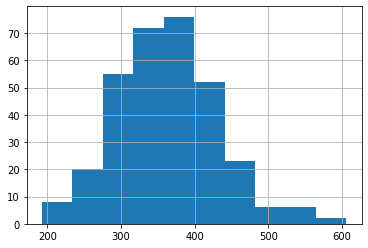

In [ ]:
data['Points Scored'].hist(bins=10)
plt.show()

In [ ]:
# Rename Points Scored column
data = data.rename(columns={'Points Scored':'Scores'})


In [ ]:
data.head()

,Team,Season,Scores
0,Baltimore Ravens,2010,357.0
1,San Francisco 49ers,2010,305.0
2,Tampa Bay Buccaneers,2010,341.0
3,New Orleans Saints,2010,384.0
4,Kansas City Chiefs,2010,366.0


In [ ]:
# Unstack the data to create a pivot table with Team as index and Season as columns
pivot_data = data.pivot(index='Team', columns='Season', values='Scores')


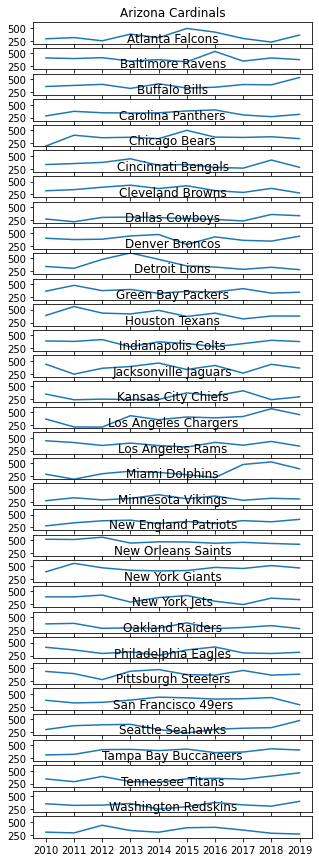

In [ ]:
# Use Sparklines to show how scoring for each team has changed over these 10 seasons
plt.figure(figsize=(5,15))
for i, team in enumerate(pivot_data.index):
    plt.subplot(len(pivot_data), 1, i+1)
    plt.title(team)
    plt.plot(pivot_data.loc[team])
    plt.xticks(pivot_data.columns)
    plt.ylim(pivot_data.min().min(), pivot_data.max().max())
plt.show()

**Umbrella Sales.** 

The file Umbrella contains data on the quarterly sales revenue for a manufacturer of umbrellas and other weather-resistant gear. 

a) Create a line chart for the sales time series data. Add a four-period moving average to the chart to smooth the data. 



In [ ]:
# Load data
data2 = pd.read_excel("/content/drive/MyDrive/Copy of Umbrella.xlsx")
data2

,Year,Quarter,Sales (Thousands $)
0,1,I,125
1,1,II,153
2,1,III,106
3,1,IV,88
4,2,I,118
5,2,II,161
6,2,III,133
7,2,IV,102
8,3,I,138
9,3,II,144


In [ ]:
data2.columns

Index(['Year', 'Quarter', 'Sales (Thousands $)'], dtype='object')

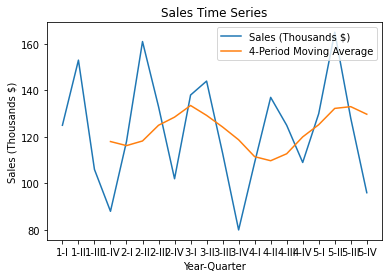

In [ ]:
# Create a line chart for the sales time series data
plt.plot(data2['Year'].astype(str) + '-' + data2['Quarter'], data2['Sales (Thousands $)'], label='Sales (Thousands $)')

# Add a four-period moving average to the chart to smooth the data
rolling_avg = data2['Sales (Thousands $)'].rolling(window=4).mean()
plt.plot(data2['Year'].astype(str) + '-' + data2['Quarter'], rolling_avg, label='4-Period Moving Average')

# Add a title and axis labels
plt.title('Sales Time Series')
plt.xlabel('Year-Quarter')
plt.ylabel('Sales (Thousands $)')

# Add a legend
plt.legend()

# Show the chart
plt.show()


b) To investigate the possibility of seasonality on a quarterly basis, plot the data as a collection of five data series (one for each year). From this visualization, do you observe any indication of seasonality? If so, describe it.



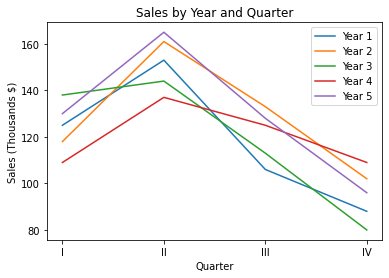

In [ ]:

# Create a plot of the sales data for each year
years = data2['Year'].unique()
for year in years:
    year_df = data2[data2['Year'] == year]
    plt.plot(year_df['Quarter'], year_df['Sales (Thousands $)'], label=f'Year {year}')

# Add a title and axis labels
plt.title('Sales by Year and Quarter')

plt.xlabel('Quarter')
plt.ylabel('Sales (Thousands $)')

# Add a legend
plt.legend()

# Show the chart
plt.show()


This code will create a plot of the sales data for each year, with each year's data shown in a different color. The x-axis shows the quarter (I, II, III, or IV), and the y-axis shows the sales in thousands of dollars.

By looking at this plot, you may be able to observe any indication of seasonality. If there is seasonality, you would expect to see a pattern in the data that repeats itself every year. For example, if the data shows a spike in sales in the first quarter of every year, this could be an indication of seasonality.

In this case, it is difficult to say definitively whether there is seasonality in the data from just looking at the plot. However, it is possible that there is some seasonality, as there seems to be a slight dip in sales in the second quarter of each year, followed by an increase in the third quarter, and then a decrease in the fourth quarter. However, this pattern is not very clear and there may be other factors affecting the sales data as well. Further analysis and modeling would be needed to determine whether there is seasonality in the data.

**Market Capitalization and Profit By Sector.** 

The file Fortune500Sector contains data on the profits, market capitalizations, and industry sector for a recent sample of firms in the Fortune 500. 

a) Differentiating observations by using a different color for each industry sector, prepare a scatter chart to show the relationship between the variables Market Capitalization and Profit in which Market Capitalization is on the vertical axis and Profit is on the horizontal axis.  



In [ ]:
# Load data
fortune = pd.read_excel('/content/drive/MyDrive/Copy of Fortune500Sector.xlsx')
fortune.head()

,Company,Sector,Profits ($ millions),Market Capitalization ($ millions)
0,Alliant Techsystems,Industrials,313.2,1891.9
1,Amazon.com,Consumer,631.0,81458.6
2,AmerisourceBergen,Healthcare,706.6,10087.6
3,Avis Budget Group,Industrials,-29.0,1175.8
4,Boeing,Industrials,4018.0,55188.8


In [ ]:
fortune['Sector'].unique

<bound method Series.unique of 0     Industrials
1        Consumer
2      Healthcare
3     Industrials
4     Industrials
5      Healthcare
6      Technology
7        Consumer
8          Energy
9        Consumer
10     Healthcare
11    Industrials
12      Financial
13    Industrials
14       Consumer
15       Consumer
16       Consumer
17     Healthcare
18       Consumer
19       Consumer
20    Industrials
21     Healthcare
22    Industrials
23    Industrials
24       Consumer
25       Consumer
26    Industrials
27    Industrials
28    Industrials
29    Industrials
30     Healthcare
Name: Sector, dtype: object>

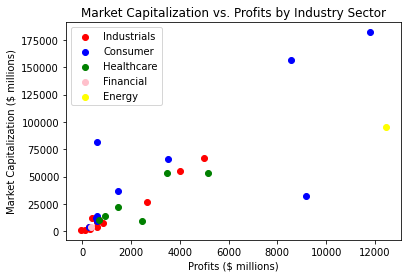

In [ ]:
# Create a dictionary mapping each sector to a unique color
sector_colors = {
    'Industrials': 'red',
    'Consumer': 'blue',
    'Healthcare': 'green',
    'Financial':'pink',
    'Energy':'yellow'
}

# Create a scatter plot of market capitalization vs. profits, with different colors for each sector
for sector in sector_colors:
    sector_df = fortune[fortune['Sector'] == sector]
    plt.scatter(sector_df['Profits ($ millions)'], sector_df['Market Capitalization ($ millions)'],
                color=sector_colors[sector], label=sector)

# Add axis labels and a title
plt.xlabel('Profits ($ millions)')
plt.ylabel('Market Capitalization ($ millions)')
plt.title('Market Capitalization vs. Profits by Industry Sector')

# Add a legend
plt.legend()

# Show the chart
plt.show()

This code will create a scatter plot of the relationship between market capitalization and profits, with market capitalization on the vertical axis and profits on the horizontal axis. Each observation is differentiated by using a different color for each industry sector. The legend shows which color corresponds to which industry sector.

By looking at this plot, you can see how market capitalization and profits are related for each industry sector. For example, you can see that the industrials sector has the highest market capitalization and profits, while the healthcare sector has lower market capitalization and profits. You can also see that Amazon.com, in the consumer sector, has a much higher market capitalization than any other company in the plot, despite having profits that are not the highest.

b) 
 Emphasize the relationship between Market Capitalization and Profit within the healthcare sector by formatting all other sectors with data points in gray with no fill. Create a trendline based only on the observations in the healthcare sector. What does the trendline indicate about this relationship between Market Capitalization and Profit within the healthcare sector? 


# Construct the relative frequency distribution of records over the values of the Category variable. Describe your findings. 

In [ ]:
ejb = pd.read_excel('/content/drive/MyDrive/Copy of EJB.xlsx')
ejb.head()

,Order ID,Flavor,Category,$ Sales,Date Ordered,Date Delivered,Distribution Center,New Customer?,Service Satisfaction Rating,Product Satisfaction Rating
0,92145,Beet,Juices,605.97,2018-01-01,2018-01-03,ID,Yes,3.0,NaN
1,92145,Apple,Juices,1549.00,2018-01-01,2018-01-03,ID,Yes,5.0,4.0
2,92145,Apple,Juices,1986.28,2018-01-01,2018-01-03,ID,Yes,5.0,4.0
3,92145,Orange,Juices,16.43,2018-01-01,2018-01-03,ID,Yes,5.0,3.0
4,92145,Cucumber,Juices,1594.93,2018-01-01,2018-01-03,ID,Yes,NaN,NaN


In [ ]:
ejb.dropna(inplace=True)

In [ ]:
def rel_freq(x):
    freqs = [(value, x.count(value) / len(x)) for value in set(x)] 
    return freqs

In [ ]:
rel_freq(list(ejb['Category']))

[('Smoothies', 0.4476205434270457), ('Juices', 0.5523794565729543)]

In [ ]:
ejb.describe()

,$ Sales,Service Satisfaction Rating,Product Satisfaction Rating
count,6367.000000,6367.000000,6367.000000
mean,702.818285,3.274698,3.571384
std,499.030126,1.421225,1.363504
min,0.050000,1.000000,1.000000
25%,280.995000,2.000000,2.000000
50%,621.370000,3.000000,4.000000
75%,1054.255000,5.000000,5.000000
max,1998.880000,5.000000,5.000000


In [ ]:
ejb.Category.unique()

array(['Juices', 'Smoothies'], dtype=object)

In [ ]:
juices = ejb.groupby('Category').get_group('Juices')
juices.head()

,Order ID,Flavor,Category,$ Sales,Date Ordered,Date Delivered,Distribution Center,New Customer?,Service Satisfaction Rating,Product Satisfaction Rating
1,92145,Apple,Juices,1549.00,2018-01-01,2018-01-03,ID,Yes,5.0,4.0
2,92145,Apple,Juices,1986.28,2018-01-01,2018-01-03,ID,Yes,5.0,4.0
3,92145,Orange,Juices,16.43,2018-01-01,2018-01-03,ID,Yes,5.0,3.0
12,92150,Grape,Juices,1366.97,2018-01-01,2018-01-03,NE,Yes,3.0,5.0
25,92247,Carrot,Juices,411.28,2018-01-10,2018-01-12,ND,No,4.0,5.0


In [ ]:
smoothies = ejb.groupby('Category').get_group('Smoothies')
smoothies.head()

,Order ID,Flavor,Category,$ Sales,Date Ordered,Date Delivered,Distribution Center,New Customer?,Service Satisfaction Rating,Product Satisfaction Rating
14,92152,Orange,Smoothies,63.72,2018-01-01,2018-01-03,NM,Yes,3.0,3.0
31,92265,Grape,Smoothies,36.91,2018-01-12,2018-01-14,ID,No,5.0,2.0
36,92298,Carrot,Smoothies,303.48,2018-01-16,2018-01-18,ND,Yes,1.0,2.0
41,92301,Pear,Smoothies,291.04,2018-01-16,2018-01-18,NE,No,1.0,4.0
45,92309,Apple,Smoothies,877.43,2018-01-16,2018-01-18,RI,No,1.0,3.0


(array([ 298.,    0.,  634.,    0.,    0.,  633.,    0.,  643.,    0.,
        1309.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

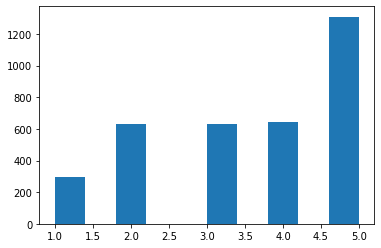

In [ ]:
plt.hist(juices['Product Satisfaction Rating'])

(array([611., 519., 514., 426., 378., 314., 246., 213., 183., 113.]),
 array([3.100000e-01, 2.001670e+02, 4.000240e+02, 5.998810e+02,
        7.997380e+02, 9.995950e+02, 1.199452e+03, 1.399309e+03,
        1.599166e+03, 1.799023e+03, 1.998880e+03]),
 <BarContainer object of 10 artists>)

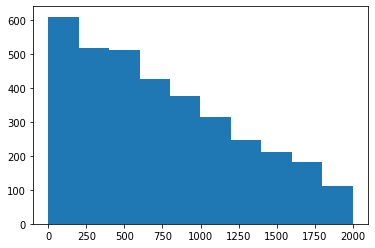

In [ ]:
plt.hist(juices['$ Sales'])

(array([490.,   0., 705.,   0.,   0., 639.,   0., 703.,   0., 980.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

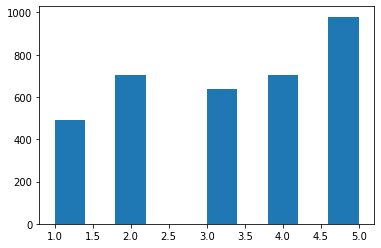

In [ ]:
plt.hist(juices['Service Satisfaction Rating'])

(array([ 235.,    0.,  543.,    0.,    0.,  505.,    0.,  514.,    0.,
        1053.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

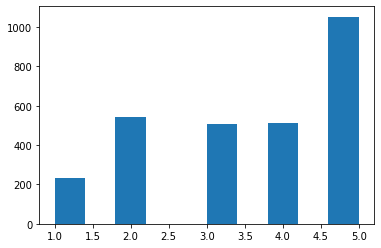

In [ ]:
plt.hist(smoothies['Product Satisfaction Rating'])

(array([582., 455., 406., 360., 341., 277., 194., 127.,  72.,  36.]),
 array([5.000000e-02, 1.968940e+02, 3.937380e+02, 5.905820e+02,
        7.874260e+02, 9.842700e+02, 1.181114e+03, 1.377958e+03,
        1.574802e+03, 1.771646e+03, 1.968490e+03]),
 <BarContainer object of 10 artists>)

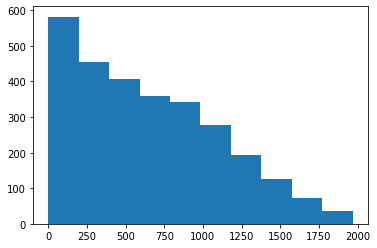

In [ ]:
plt.hist(smoothies['$ Sales'])

(array([429.,   0., 538.,   0.,   0., 531.,   0., 537.,   0., 815.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

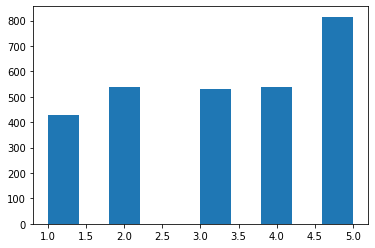

In [ ]:
plt.hist(smoothies['Service Satisfaction Rating'])

## Construct the relative frequency distribution of records over the values of the New Customer variable. In the PivotTable, relabel a “No” value for New Customer as “Existing” and a “Yes” value as “New.” Describe your findings. 

In [ ]:
ejb["New Customer?"] = ejb["New Customer?"].replace({"No": "Existing", "Yes": "New"})

# Considering only records that report values of Product Satisfaction Rating, construct the relative frequency distribution of records over the different flavors. 

In [ ]:
prod_sat = ejb[ejb['Product Satisfaction Rating'].notna()]

In [ ]:
freq_dist = ejb['Flavor'].value_counts()
freq_dist.head()

Orange      874
Pear        841
Cucumber    821
Apple       810
Grape       755
Name: Flavor, dtype: int64

In [ ]:
ejb['Flavor'].sum()

'AppleAppleOrangeGrapeOrangeCarrotGrapeTomatoCucumberCarrotCeleryPearAppleGrapeAppleBeetCucumberOrangeCucumberCeleryPearCucumberTomatoAppleTomatoBeetOrangeCarrotCucumberPearCucumberOrangeGrapeGrapeOrangeCucumberAppleOrangeCeleryCarrotPearGrapeOrangeCeleryOrangeCarrotAppleCeleryPearTomatoCucumberCucumberAppleBeetCarrotCucumberOrangeCucumberTomatoBeetCarrotGrapeAppleCeleryAppleAppleCeleryCeleryCucumberAppleAppleTomatoBeetTomatoGrapePearCucumberCucumberCucumberPearPearGrapeTomatoPearCeleryCeleryAppleCarrotAppleBeetCarrotCeleryTomatoGrapeCucumberTomatoTomatoAppleTomatoApplePearCarrotCeleryGrapeGrapeCeleryAppleCeleryAppleOrangeGrapeOrangeCarrotAppleGrapeCucumberGrapeGrapeCarrotCarrotOrangeCeleryCeleryBeetGrapePearGrapePearCucumberGrapeOrangeTomatoGrapeCucumberOrangeCeleryPearCucumberCucumberGrapeCeleryCucumberCucumberOrangePearPearApplePearPearCucumberPearGrapeCucumberCucumberCucumberOrangeAppleTomatoPearOrangeTomatoAppleTomatoOrangeBeetOrangeCucumberCarrotBeetCeleryCarrotGrapeCucumberCarro

In [ ]:
attrition = pd.read_csv('https://github.com/atonui/pds/blob/main/Employee-Attritionv1.csv?raw=true')
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
133